<a href="https://colab.research.google.com/github/febala86/Tareas-PIA/blob/main/BARBADILLO_LACHICA_FELIX_PIA05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de clasificación de imágenes basado en una red neuronal profunda

Se pide utilizar el dataset que viene precargado en la librería Keras: [CIFAR10](https://keras.io/api/datasets/cifar10/)


1. Importa los módulos necesarios de la librería Keras. Sugerencia:


```
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten, Dense
```



In [ ]:
# IMPORTAMOS TODAS LAS LIBRERÍAS NECESARIAS PARA GRÁFICAS Y MODELOS DE RNP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense

2. Importa el dataset CIFAR10 de Keras, en un conjunto de datos de entrenamiento y un conjunto de datos para test. Sugerencia:


```
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
```



In [ ]:
# IMPORTACIÓN DEL DATASET DIRECTAMENTE DE KERAS
from keras.datasets import cifar10
#Separación de los datos para entrenar y test.
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


3. Explora los datos, especialmente, las dimensiones del dataset. Aplica normalización a los datos de entrada y la técnica one-hot encoding a los de salida.

*Sugerencia para normalizar:*


```
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0
```
*Sugerencia de aplicación one-hot encoding para categorizar etiquetas:*


```
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
```




Este es un dataset de 50000 imágenes para entrenamiento de modelos de 32x32 pixeles y en RGB "3".

Además de 10000 imágenes de test.

Tiene a su vez 10 categoías o etiquetas.

ETIQUETA  | DESCRIPCIÓN
------|------------------
0     | Avión
1     | Automóvil
2     | Pájaro
3     | Gato
4     | Venado
5     | Perro
6     | Rana
7     | Caballo
8     | Barco
9     | Camión

x_train: Array , uint8, de datos de imagen en escala de grises con formas (50000, 32, 32, 3), que contiene los datos de entrenamiento. Los valores de píxel van de 0 a 255.

y_train: Array NumPy, uint8, de etiquetas (enteros en el rango de 0 a 9) con forma (50000, 1) para los datos de entrenamiento.

x_test: Array NumPy, uint8, de datos de imagen en escala de grises con formas (10000, 32, 32, 3), que contiene los datos de prueba. Los valores de píxel van de 0 a 255.

y_test: Array NumPy, uint8, de etiquetas (enteros en el rango de 0 a 9) con forma (10000, 1) para los datos de prueba.

In [ ]:
# Las dimensiones se calculan con shape, tenemos 50000 imágenes de 32x32 pixeles y en RGB "3"
X_train.shape


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
y_test.shape

(10000, 1)

In [ ]:
# Visualizamos la imagen número 100 de entrenamiento
plt.figure()
plt.imshow(X_train[100])
plt.colorbar()

Para poder aplica el one hot encode, utilizamos una utilidad de keras importando to_categorical.

In [8]:
# one hot encode outputs
from keras.utils import to_categorical
train_labels = to_categorical(y_train, 10)
test_labels = to_categorical(y_test, 10)
num_classes = test_labels.shape[1]


In [34]:
#Normalizamos los datos para que el valor del pixel vaya de 0 a 255 convertirlo a 0 a 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0


4. Crea un modelo basado en redes neuronales profundas que tenga más de una capa de tipo Dense (Keras). Si es necesario, usa la capa Flatten al principio. Prueba un primer modelo lo más sencillo posible.

In [11]:
model1 = Sequential()
model1.add(Flatten(input_shape=(32,32,3)))   # Capa de flatten para aplanar la entrada.
model1.add(Dense(256, activation='relu'))    # Capa densa después de la capa flatten.
model1.add(Dense(128, activation='relu'))    # Segunda capa
model1.add(Dense(10, activation='softmax'))  # Capa de salida para clasificación con 10 etiquetas.

5. Configura el entrenamiento utilizando la función compile, con la función loss = 'categorical_crossentropy' y el optimizador Adam. Utiliza la función fit para entrenar el modelo, inicialmente, con 20 epochs.

El **"batch size"** hace referencia al número de ejemplos de entrenamiento que se utilizan en una iteración durante el proceso de entrenamiento. El tamaño del lote puede afectar la velocidad de entrenamiento y la estabilidad del modelo.

Un tamaño de lote más grande puede acelerar el entrenamiento, pero también puede requerir más memoria. Un tamaño de lote más pequeño puede proporcionar una estimación más precisa del gradiente, pero el entrenamiento puede ser más lento.

El **"validation split"** es la fracción de los datos de entrenamiento que se separan para su uso en la validación del modelo.

Durante el entrenamiento, una parte de los datos se utiliza para ajustar los parámetros del modelo, y otra parte se reserva para evaluar el rendimiento del modelo en datos que no ha visto durante el entrenamiento.

**Adam (Adaptive Moment Estimation)** es un optimizador que combina las ventajas de los métodos de *momentum y RMSprop*.

Efectivo en una amplia gama de tareas de aprendizaje profundo como la clasificación de imágenes.

Para problemas de clasificación multiclase, para predecir entre más de dos clases mutuamente excluyentes, la función *loss* comúnmente utilizada es **Sparse_categorical_crossentropy**

In [12]:
# Definimos el promer modelo con compile y luego lo entrenaremos con fit
model1.compile(optimizer= 'Adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history1=model1.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=20,
    validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 14s 20ms/step - loss: 1.9076 - accuracy: 0.3145 - val_loss: 1.7873 - val_accuracy: 0.3705
Epoch 2/20
625/625 [==============================] - 11s 18ms/step - loss: 1.7062 - accuracy: 0.3905 - val_loss: 1.6977 - val_accuracy: 0.3926
Epoch 3/20
625/625 [==============================] - 12s 19ms/step - loss: 1.6292 - accuracy: 0.4188 - val_loss: 1.6969 - val_accuracy: 0.4012
Epoch 4/20
625/625 [==============================] - 12s 19ms/step - loss: 1.5757 - accuracy: 0.4366 - val_loss: 1.6121 - val_accuracy: 0.4301
Epoch 5/20
625/625 [==============================] - 12s 19ms/step - loss: 1.5319 - accuracy: 0.4509 - val_loss: 1.6040 - val_accuracy: 0.4291
Epoch 6/20
625/625 [==============================] - 11s 18ms/step - loss: 1.4969 - accuracy: 0.4651 - val_loss: 1.5800 - val_accuracy: 0.4403
Epoch 7/20
625/625 [==============================] - 10s 16ms/step - loss: 1.4653 - accuracy: 0.4772 - val_loss: 1.5250 - val_accuracy:

In [13]:
#Mostramos y guardamos la evaluzación del entrenamiento y del test para luego guardar en tabla.
test_lost, test_acc = model1.evaluate(X_test, y_test)
train_lost, train_acc = model1.evaluate(X_train, y_train)
print ('Acierto entrenamiento: ',train_acc, 'Acierto Test: ',test_acc, sep='\n')

1563/1563 [==============================] - 7s 4ms/step - loss: 1.2642 - accuracy: 0.5499
Acierto entrenamiento: 
0.5499399900436401
Acierto Test: 
0.43639999628067017


In [14]:
#Creamos dataframe de estadisticas donde se almacenarán resultados de los distintos modelos.
estadisticas=pd.DataFrame(columns=['model','test acc','train acc'])
estadisticas = pd.concat ([estadisticas, pd.DataFrame ([{'model':'Modelo1 RNP','test acc':test_acc ,'train acc':train_acc}])])
estadisticas

,model,test acc,train acc
0,Modelo1 RNP,0.4364,0.54994


6. Crea un nuevo modelo con más capas y mayor número de neuronas. Entrénalo utilizando un número mayor de epochs y analiza el resultado. ¿Has conseguido mejorar la precisión? haz varias pruebas y quédate con el modelo que mejores resultados da.
Probé sin batch_size y sin validation_split y ofrecía peores valores y tardaba significativamente más en realizar el entrenamiento.
El mejor resultado lo obtuve con 256 en la primera capa y 128 en la segunda, y con los 10 de salida.

In [19]:
# En este segundo modelo añadimos una capa, más neuronas de entrada y mas epoch "50"
model2 = Sequential()
model2.add(Flatten(input_shape=(32,32,3)))
model2.add(Dense(500, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(10, activation='softmax'))

In [20]:
model2.compile(optimizer= 'Adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history2=model2.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=50,
    validation_split=0.2)

Epoch 1/50
625/625 [==============================] - 18s 28ms/step - loss: 1.9035 - accuracy: 0.3110 - val_loss: 1.7514 - val_accuracy: 0.3667
Epoch 2/50
625/625 [==============================] - 18s 30ms/step - loss: 1.7056 - accuracy: 0.3885 - val_loss: 1.7108 - val_accuracy: 0.3835
Epoch 3/50
625/625 [==============================] - 18s 28ms/step - loss: 1.6216 - accuracy: 0.4180 - val_loss: 1.6684 - val_accuracy: 0.4060
Epoch 4/50
625/625 [==============================] - 22s 36ms/step - loss: 1.5619 - accuracy: 0.4418 - val_loss: 1.5876 - val_accuracy: 0.4343
Epoch 5/50
625/625 [==============================] - 18s 28ms/step - loss: 1.5108 - accuracy: 0.4625 - val_loss: 1.5460 - val_accuracy: 0.4443
Epoch 6/50
625/625 [==============================] - 18s 29ms/step - loss: 1.4792 - accuracy: 0.4721 - val_loss: 1.5382 - val_accuracy: 0.4614
Epoch 7/50
625/625 [==============================] - 17s 28ms/step - loss: 1.4402 - accuracy: 0.4845 - val_loss: 1.5525 - val_accuracy:

7. Utiliza el método evaluate para ver la precisión que se alcanzaría con datos nuevos, aplicándolo al conjunto de datos de test. ¿Es muy diferente a la precisión alcanzada en el entrenamiento?

Pues a nivel de entrenamiento el número de epoch ha mejorado mucho el acccuracy pero en test ha arrojado un resultado similar al anterior modelo con una capa menos y menos neuronas.

In [21]:
test_lost, test_acc = model2.evaluate(X_test, y_test)
train_lost, train_acc = model2.evaluate(X_train, y_train)
print ('Acierto entrenamiento: ',train_acc, 'Acierto Test: ',test_acc, sep='\n')

1563/1563 [==============================] - 9s 6ms/step - loss: 0.9481 - accuracy: 0.7066
Acierto entrenamiento: 
0.70660001039505
Acierto Test: 
0.42739999294281006


In [22]:
estadisticas = pd.concat ([estadisticas, pd.DataFrame ([{'model':'Modelo2 RNP','test acc':test_acc ,'train acc':train_acc}])])
estadisticas

,model,test acc,train acc
0,Modelo1 RNP,0.4364,0.54994
0,Modelo2 RNP,0.4274,0.70660


In [23]:
model3 = Sequential()
model3.add(Flatten(input_shape=(32,32,3)))
model3.add(Dense(360, activation='relu'))
model3.add(Dense(180, activation='relu'))
model3.add(Dense(10, activation='softmax'))

In [24]:
model3.compile(optimizer= 'Adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history3=model3.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=50,
    validation_split=0.2)

Epoch 1/50
625/625 [==============================] - 11s 16ms/step - loss: 1.8815 - accuracy: 0.3148 - val_loss: 1.7860 - val_accuracy: 0.3552
Epoch 2/50
625/625 [==============================] - 10s 16ms/step - loss: 1.7047 - accuracy: 0.3859 - val_loss: 1.6817 - val_accuracy: 0.4028
Epoch 3/50
625/625 [==============================] - 9s 15ms/step - loss: 1.6361 - accuracy: 0.4132 - val_loss: 1.6172 - val_accuracy: 0.4264
Epoch 4/50
625/625 [==============================] - 10s 16ms/step - loss: 1.5719 - accuracy: 0.4367 - val_loss: 1.6309 - val_accuracy: 0.4109
Epoch 5/50
625/625 [==============================] - 10s 16ms/step - loss: 1.5387 - accuracy: 0.4487 - val_loss: 1.5672 - val_accuracy: 0.4397
Epoch 6/50
625/625 [==============================] - 10s 16ms/step - loss: 1.5024 - accuracy: 0.4603 - val_loss: 1.6125 - val_accuracy: 0.4318
Epoch 7/50
625/625 [==============================] - 9s 14ms/step - loss: 1.4753 - accuracy: 0.4727 - val_loss: 1.5364 - val_accuracy: 0

In [25]:
test_lost, test_acc = model3.evaluate(X_test, y_test)
train_lost, train_acc = model3.evaluate(X_train, y_train)
print ('Acierto entrenamiento: ',train_acc, 'Acierto Test: ',test_acc, sep='\n')

1563/1563 [==============================] - 8s 5ms/step - loss: 1.0841 - accuracy: 0.6231
Acierto entrenamiento: 
0.6230800151824951
Acierto Test: 
0.4180999994277954


In [26]:
estadisticas = pd.concat ([estadisticas, pd.DataFrame ([{'model':'Modelo3 RNP','test acc':test_acc ,'train acc':train_acc}])])
estadisticas

,model,test acc,train acc
0,Modelo1 RNP,0.4364,0.54994
0,Modelo2 RNP,0.4274,0.70660
0,Modelo3 RNP,0.4181,0.62308


En este tercer modelo volvemos a poner 2 capas pero más neuronas por capa no obteniendo mejoras significativas, de hecho los 3 resultados son muy similares. Está claro que a más epoch mejores resultados de aprendizaje pero en los test sigue arrojando valores que son malos.
El el siguiente bloque vamos a representar "estadísticas" el dataframe con los valores recogidos del entrenamiento y test de cada modelo para poder compararlos.

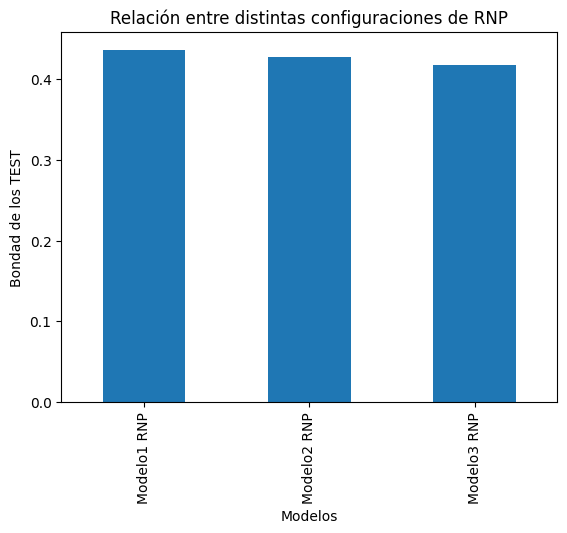

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
estadisticas.plot(kind='bar', x='model', y='test acc', legend=False)
plt.xlabel('Modelos')
plt.ylabel('Bondad de los TEST')
plt.title('Relación entre distintas configuraciones de RNP')

# Mostrar la gráfica
plt.show()

El modelo 1 con 2 capas y 20 iteraciones ha conseguido mejor resultado que el modelo 2 con 3 capas muchas más neuronas y muchas más iteraciones.
El modelo 3 pese a tener 2 capas y más neuronas por capa, aún con 50 epoch no ha conseguido superar al primer modelo luego no por poner más neuronas se consigue en este dataset mejores resultados.


8. Explora de forma visual la precisión que se consigue, representando las primeras 25 imágenes del conjunto de datos de test, y comparando la etiqueta real con la de la predicción. Aquí tienes una posible forma de hacerlo (recuerda poner el nombre de tu modelo a la hora de aplicar el método predict):


```
predictions = model.predict(X_test)

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    predicted_label = predictions[i]
    true_label = y_test[i]
    if predicted_label.argmax() == true_label.tolist().index(1.):
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label.argmax()],
                                  class_names[true_label.tolist().index(1.)]),
                                  color=color)
                                
```



Para el código facilitado tuve errores debido al método index para encontrar el índice del valor 1 en el array. Lo cual no funcionará correctamente si el valor 1 no es el primer elemento en el array.

plt.figure(figsize=(10,10))
for i in range(25):
...
if predicted_label.argmax() == true_label.tolist().index(1.): **"aquí"**
class_names[true_label.tolist().index(1.)]), **"aquí"**

Navegando por internet encontré que si usas el método argmax() para obtener el índice del valor máximo en el array.

                                  

313/313 [==============================] - 1s 4ms/step


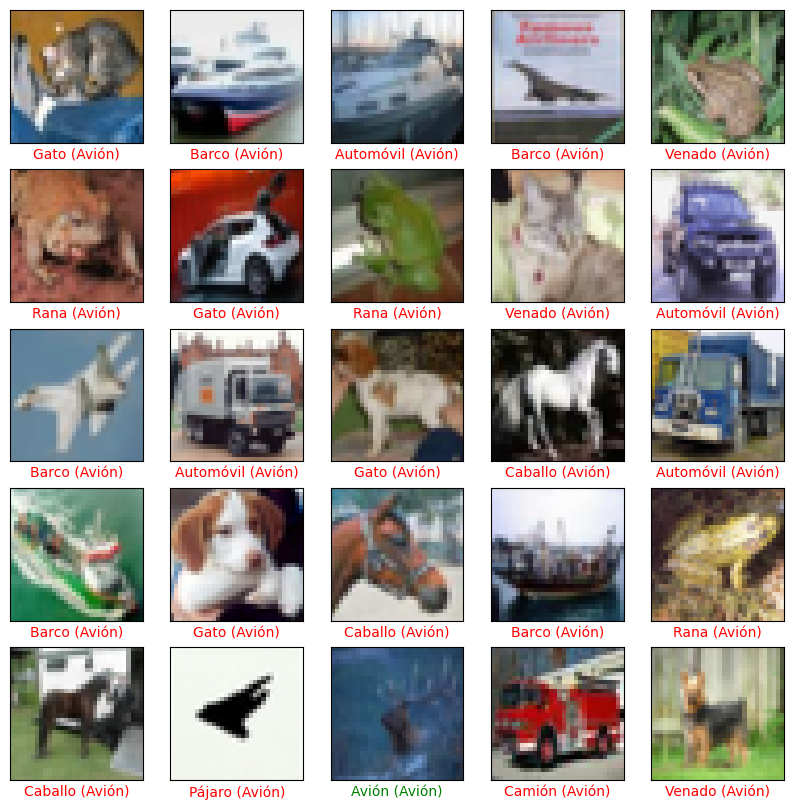

In [57]:
predictions = model1.predict(X_test)

class_names = ['Avión', 'Automóvil', 'Pájaro', 'Gato', 'Venado',
               'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    predicted_label = predictions[i]
    true_label = y_test[i]
    if predicted_label.argmax() == true_label.argmax(): color = 'green'
    else: color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label.argmax()], class_names[true_label.argmax()]), color=color)

Como era de esperar siendo el modelo tan limitado, no ha acertado casi nada.

#BIBLIOGRAFÍA
Referencia  | Enlace
-------------------|------------------
Enlace colab            | <a href="https://colab.research.google.com/drive/1fN6tWaDWMQUv5MKuiTnGg7vP6q0QAQCT?usp=sharing"/>Pincha aquí</a>
Stackoverflow | <a href=https://stackoverflow.com/questions/5469286/how-to-get-the-index-of-a-maximum-element-in-a-numpy-array-along-one-axis/>Pincha aquí</a>
Grabaciones clases           | <a href="https://educacionadistancia.juntadeandalucia.es/formacionprofesional/mod/lti/view.php?id=86434"/>Pincha aquí</a>
Unidad didáctica 5 | <a href="https://educacionadistancia.juntadeandalucia.es/formacionprofesional/blocks/recopila/recopila.php?id=4218&dopt=1">Pincha aquí</a>

<div align="LEFT">
<a href=https://github.com/dashboard/>
<img src="https://www.enriquedans.com/wp-content/uploads/2018/06/GitHub-Octocat.jpg" alt="Enlace a github del autor" width="150" height="150"align="justify" /></a>
<p><a href=https://www.enriquedans.com/wp-content/uploads/2018/06/GitHub-Octocat.jpg/><font size="1" color="#87CEEB">Imagen<p/></a></div>